In [2]:

import numpy as np         #numpy is used for most of the mathematical (as np ables us to use it as a shortcut)
import matplotlib.pyplot as plt     # for charts and graphs
import pandas as pd

dataset = pd.read_csv('/kaggle/input/car-prices-based-on-horsepower/mobil_mesin_harga.csv') 

In [3]:
dataset.head()

,KekuatanMesin,Harga
0,111,134.95
1,111,165.00
2,154,165.00
3,102,139.50
4,115,174.50


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   KekuatanMesin  200 non-null    int64  
 1   Harga          200 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 3.2 KB


In [5]:
X= dataset.iloc[:, 0].values        # stores all the values of the columns except the last one (because last one is dependant )
y= dataset.iloc[:, 1].values            # stores all the values of the last one in y (dependant)

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test , y_train , y_test = train_test_split(X, y , test_size= 0.2, random_state=0)

In [7]:
# buildinf the ANN
import keras
from keras.models import Sequential

from keras.layers import Dense, Dropout, BatchNormalization


#intitialize ANN
classifier = Sequential()

# maiking the first hidden layer
classifier.add(Dense(units= 32, kernel_initializer = 'uniform', activation= 'relu', input_dim=1))


# adding second layer
classifier.add(Dense(units= 64, kernel_initializer = 'uniform', activation= 'relu'))



# adding second layer
classifier.add(Dense(units= 64, kernel_initializer = 'uniform', activation= 'relu'))



#adding the output layer
classifier.add(Dense(units= 1, kernel_initializer = 'uniform', activation= 'linear'))

#compiling sll the layers
classifier.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])


#fitting into train set
classifier.fit(X_train,y_train,batch_size=10, epochs= 100,validation_split=0.15)

2024-07-02 07:10:39.092400: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-02 07:10:39.092552: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-02 07:10:39.262110: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Epoch 1/100


/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 22720.9023 - mae: 131.0687 - val_loss: 24894.2871 - val_mae: 129.5806
Epoch 2/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 25748.9062 - mae: 138.3512 - val_loss: 24381.6016 - val_mae: 127.9051
Epoch 3/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 20430.6758 - mae: 123.1600 - val_loss: 22333.7051 - val_mae: 121.0148
Epoch 4/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 18703.9453 - mae: 118.3110 - val_loss: 16622.7500 - val_mae: 99.5556
Epoch 5/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 10983.9131 - mae: 83.8237 - val_loss: 7113.5386 - val_mae: 48.6699
Epoch 6/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3724.4971 - mae: 41.1756 - val_loss: 3401.3860 - val_mae: 45.0659
Epoch 7/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2356.8201 - mae: 41.3371 - val_loss: 3369.5237 - val_mae: 36.8415
Epoch 8/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2321.7563 - mae: 37.4769 - val_loss: 3445.1423 - val_mae: 35.

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


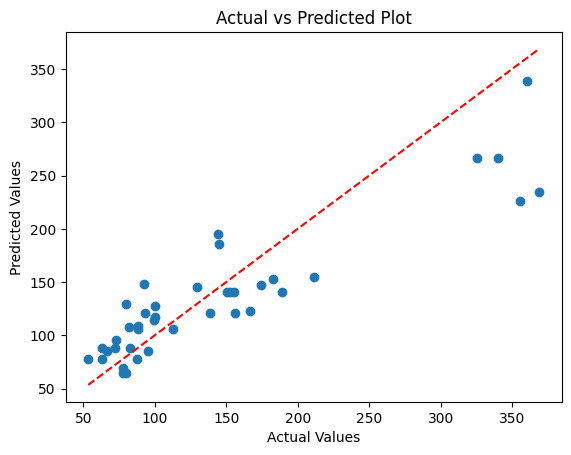

In [8]:
y_pred=classifier.predict(X_test)



plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Plot')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.show()